In [1]:
#Import Python/ML Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [2]:
#Load in data
admissions_data_df = pd.read_csv('admissions_data.csv')
#Split data into features and labels
features = admissions_data_df.iloc[:, :-1]
labels = admissions_data_df.iloc[:, -1]
#Split data into train and test categories
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 69)

In [3]:
#Scale data so that all features/columns have equal weight in the model
scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train))
features_test = pd.DataFrame(scaler.transform(features_test))

In [4]:
#Create neural network to perform regression analysis on admission data
model = Sequential()
model.add(layers.InputLayer(input_shape = (features_train.shape[1],)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'sigmoid'))
model.add(layers.Dense(1, activation = 'linear'))
learning_rate = 0.01
optimizer = keras.optimizers.legacy.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])

In [5]:
#Fit/refine model
es = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
history = model.fit(features_train, labels_train.to_numpy(), epochs = 100, batch_size = 8, verbose = 1, validation_split = 0.25, callbacks = [es])

#Evaluate the model
val_mse, val_mae = model.evaluate(features_test, labels_test, callbacks = [es], verbose = 0)
print("MAE: ", val_mae)
y_pred = model.predict(features_test)
print(r2_score(labels_test,y_pred))

Epoch 1/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0264 - mae: 0.1233 - val_loss: 0.0062 - val_mae: 0.0607
Epoch 2/100
38/38 [==============================] - 0s 659us/step - loss: 0.0057 - mae: 0.0590 - val_loss: 0.0039 - val_mae: 0.0487
Epoch 3/100
38/38 [==============================] - 0s 590us/step - loss: 0.0043 - mae: 0.0484 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 4/100
38/38 [==============================] - 0s 665us/step - loss: 0.0039 - mae: 0.0458 - val_loss: 0.0035 - val_mae: 0.0478
Epoch 5/100
38/38 [==============================] - 0s 610us/step - loss: 0.0038 - mae: 0.0470 - val_loss: 0.0046 - val_mae: 0.0562
Epoch 6/100
38/38 [==============================] - 0s 566us/step - loss: 0.0036 - mae: 0.0452 - val_loss: 0.0036 - val_mae: 0.0466
Epoch 7/100
38/38 [==============================] - 0s 578us/step - loss: 0.0036 - mae: 0.0444 - val_loss: 0.0039 - val_mae: 0.0514
Epoch 8/100
38/38 [==============================] - 0s 562us/step - lo

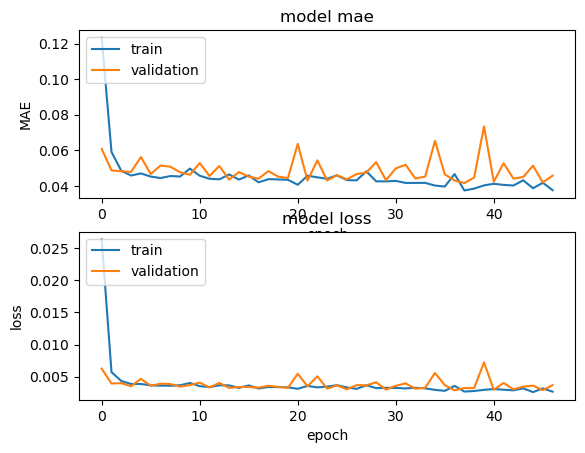

In [6]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()